# Analysis of speed and throughput of storage engines

## Functions for analyzing benchmarks

In [29]:
import numpy as np 
import matplotlib.pyplot as plt

import os
import linecache

def analyze_benchmarks_for_workload(workload_benchmark_file_path):
    writing_throughput = int(linecache.getline(workload_benchmark_file_path, 18).split(' ')[3])
    reading_throughput = int(linecache.getline(workload_benchmark_file_path, 19).split(' ')[3])
    deleting_throughput = int(linecache.getline(workload_benchmark_file_path, 20).split(' ')[3])
    mixed_throughput = int(linecache.getline(workload_benchmark_file_path, 21).split(' ')[3])

    return writing_throughput, reading_throughput, deleting_throughput, mixed_throughput

def analyze_benchmarks_for_storage_engine(storage_engine_benchmark_files_directory_path, workload_sizes):
    throughputs = { 'writing': {}, 'reading': {}, 'deleting': {}, 'mixed': {} }

    for workload_size in workload_sizes:
        workload_benchmark_file_path = os.path.join(storage_engine_benchmark_files_directory_path, str(workload_size))

        workload_throughputs = analyze_benchmarks_for_workload(workload_benchmark_file_path)

        throughputs['writing'][workload_size] = workload_throughputs[0]
        throughputs['reading'][workload_size] = workload_throughputs[1]
        throughputs['deleting'][workload_size] = workload_throughputs[2]
        throughputs['mixed'][workload_size] = workload_throughputs[3]

    return throughputs

def analyze_benchmarks(benchmark_files_directory_path, storage_engine_types, workload_sizes):
    storage_engine_benchmarks = {}

    for storage_engine_type in storage_engine_types:
        storage_engine_benchmark_file_path = os.path.join(benchmark_files_directory_path, storage_engine_type)

        storage_engine_benchmarks[storage_engine_type] = analyze_benchmarks_for_storage_engine(storage_engine_benchmark_file_path, workload_sizes)

    return storage_engine_benchmarks



## Functions for drawing throughput charts

In [30]:
def benchmark_chart_for(benchmarks, storage_engine_types, storage_engine_names, workload_type, workload_sizes):
    count = 0

    plt.figure(figsize = (20, 10))

    for storage_engine_type in storage_engine_types:
        throughputs = [benchmarks[storage_engine_type][workload_type][workload_size] for workload_size in workload_sizes]

        plt.plot(workload_sizes, throughputs, label = storage_engine_names[count])

        count += 1

    plt.title(workload_type.capitalize() + ' throughput comparison')
    plt.xlabel('Number of documents written')
    plt.ylabel('Throughput in bytes/ms')
    plt.legend()

    plt.show()

## Throughput benchmarking comparison charts

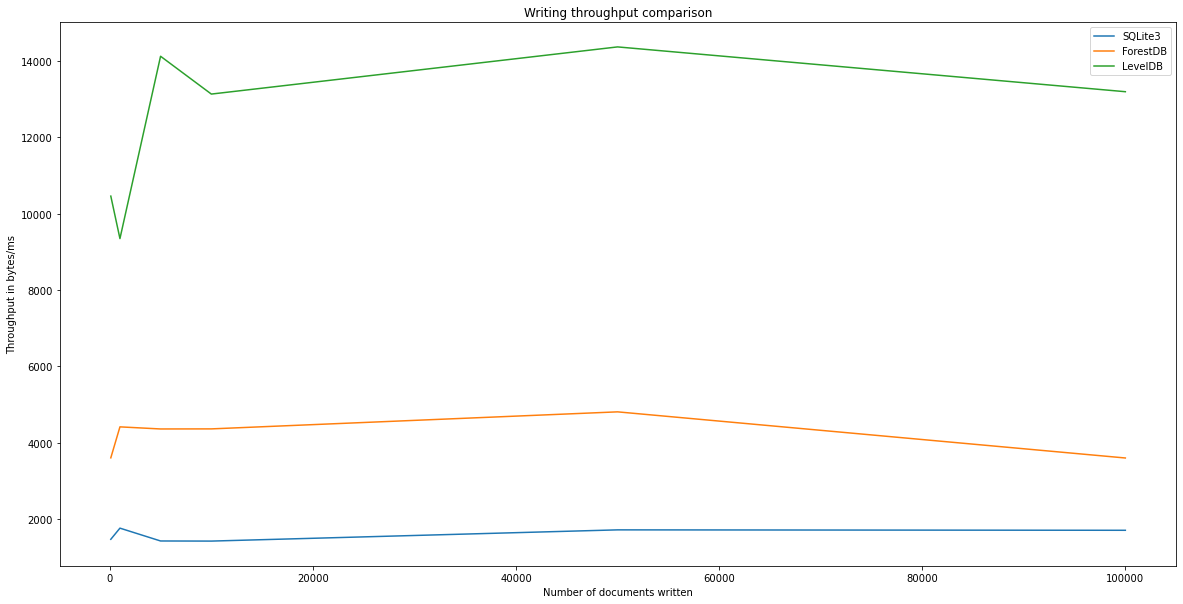

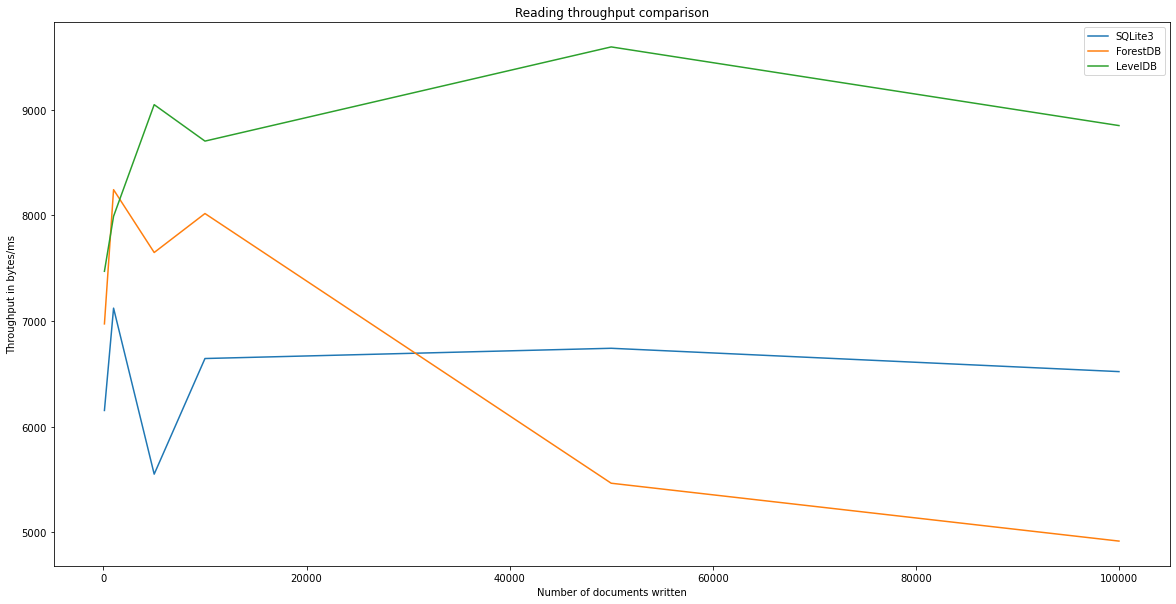

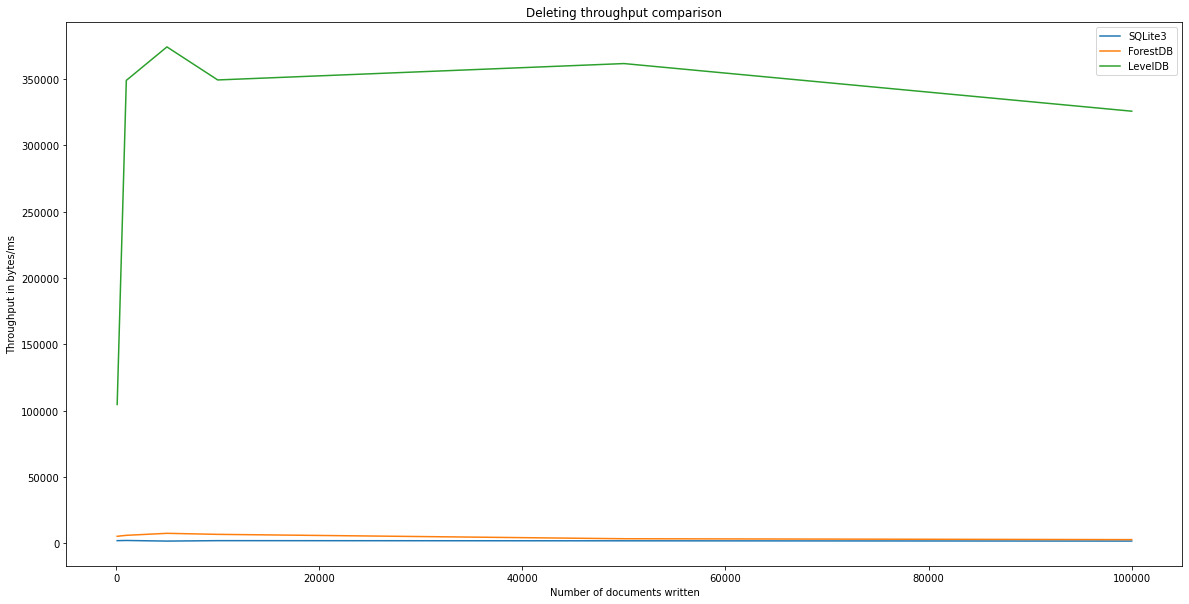

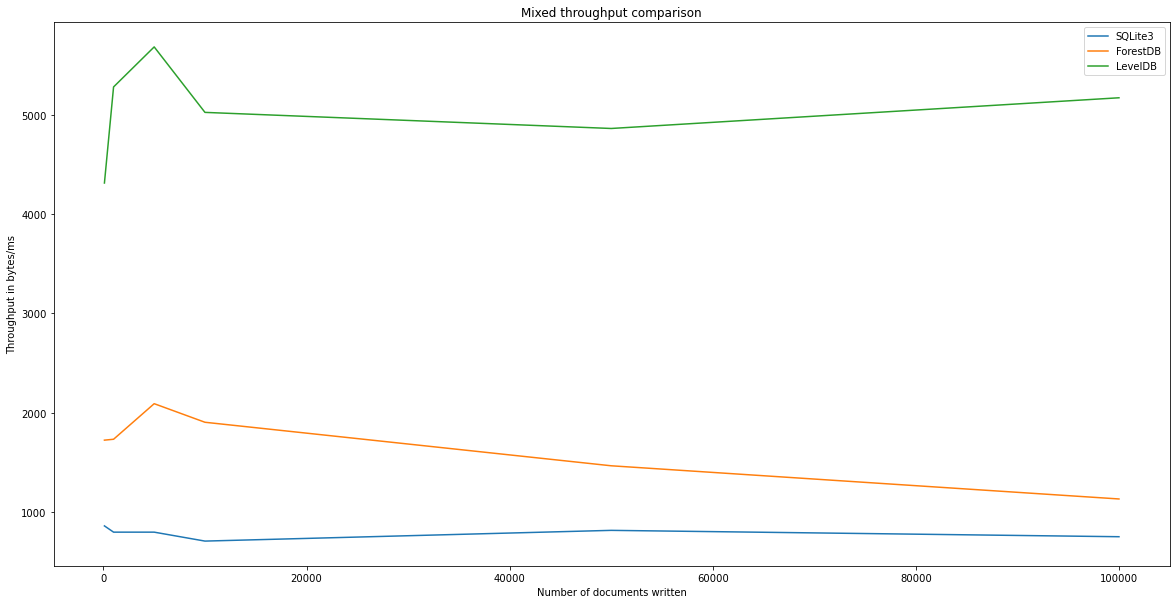

In [31]:
# Storage engines and workload sizes to analyze
# -----------------------------------------------------------------
# Types and names of storage engines
STORAGE_ENGINE_TYPES = ['sqlite3', 'forestdb', 'leveldb']
STORAGE_ENGINE_NAMES = ['SQLite3', 'ForestDB', 'LevelDB']

# Workload settings
WORKLOAD_TYPES= ['writing', 'reading', 'deleting', 'mixed']  # Types of workloads to analyze and visualize
WORKLOAD_SIZES = [100, 1000, 5000, 10000, 50000, 100000]  # Sizes of workloads to analyze and visualize

# Analyzing the benchmarks
# -----------------------------------------------------------------

benchmarks = analyze_benchmarks('../metrics/benchmarking', STORAGE_ENGINE_TYPES, WORKLOAD_SIZES)

# Drawing charts for comparison
# -----------------------------------------------------------------

for workload_type in WORKLOAD_TYPES:
    benchmark_chart_for(benchmarks, STORAGE_ENGINE_TYPES, STORAGE_ENGINE_NAMES, workload_type, WORKLOAD_SIZES)